In [61]:
'''Select axon analytic .csv files to plot/compare'''

import pandas as pd
import os

'''get current working directory, change it to project root directory'''
os.getcwd()
os.chdir('/home/adam/workspace/git_workspace/MEA_Analysis/')


# Load the uploaded files into dataframes
files = [
    "./AxonReconPipeline/data/temp_data/reconstructions/240328/M07037/AxonTracking/000055/well000_axon_analytics.csv",
    "./AxonReconPipeline/data/temp_data/reconstructions/240328/M07037/AxonTracking/000055/well001_axon_analytics.csv",
    "./AxonReconPipeline/data/temp_data/reconstructions/240328/M07037/AxonTracking/000055/well002_axon_analytics.csv",
    "./AxonReconPipeline/data/temp_data/reconstructions/240328/M07037/AxonTracking/000055/well003_axon_analytics.csv",
    "./AxonReconPipeline/data/temp_data/reconstructions/240328/M07037/AxonTracking/000055/well004_axon_analytics.csv",
    "./AxonReconPipeline/data/temp_data/reconstructions/240328/M07037/AxonTracking/000055/well005_axon_analytics.csv",
]

files = [os.path.abspath(file) for file in files]
dfs = [pd.read_csv(file) for file in files]

# # Display the first few rows of each dataframe to understand their structure
# dfs_summaries = [df.head() for df in dfs]
# dfs_summaries

/tmp/ipykernel_1381862/2299011482.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y='Length', data=data, showmeans=True, meanline=True, showfliers=False, palette=pastel_colors)


<Figure size 1200x800 with 0 Axes>

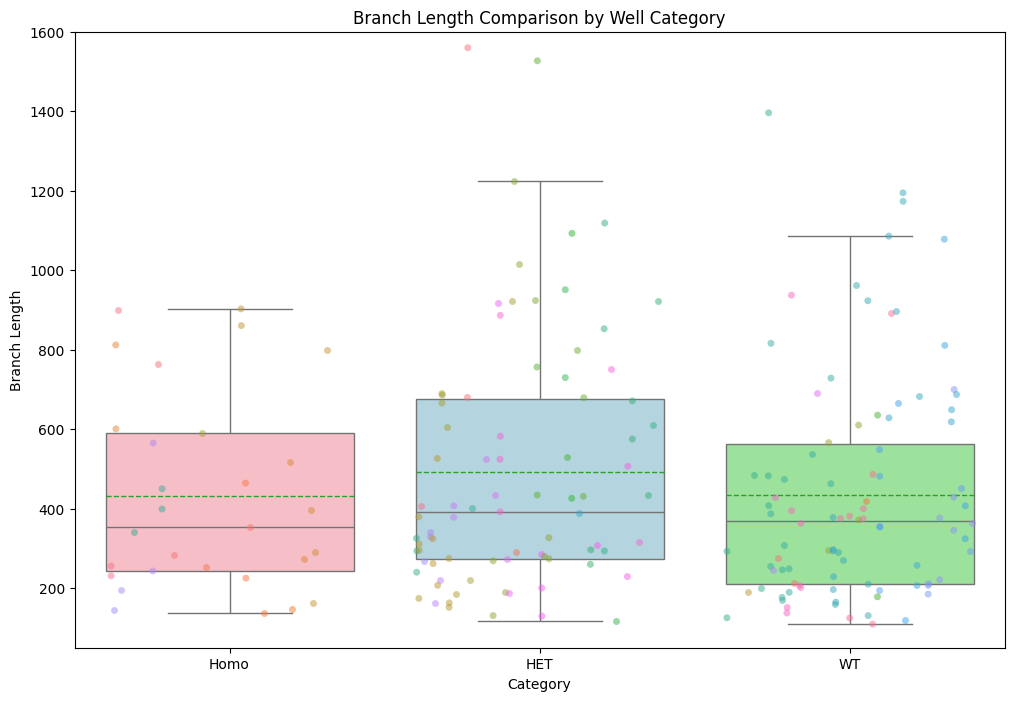

/tmp/ipykernel_1381862/2299011482.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y='Length', data=data, showmeans=True, meanline=True, showfliers=False, palette=pastel_colors)


<Figure size 1200x800 with 0 Axes>

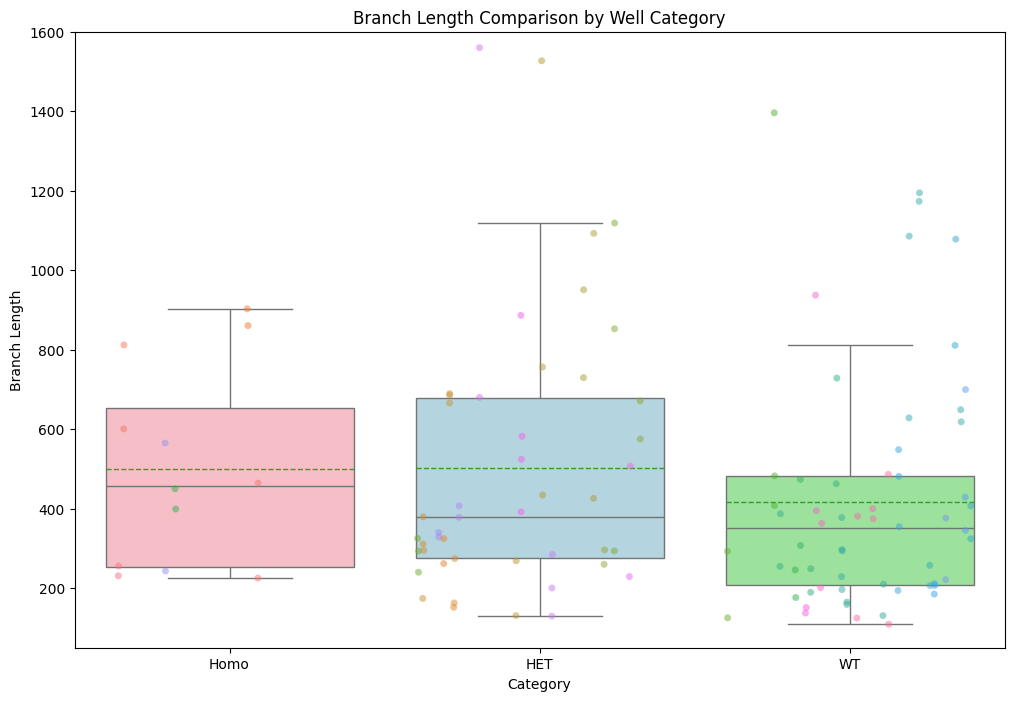

/tmp/ipykernel_1381862/2299011482.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y='Length', data=data, showmeans=True, meanline=True, showfliers=False, palette=pastel_colors)


<Figure size 1200x800 with 0 Axes>

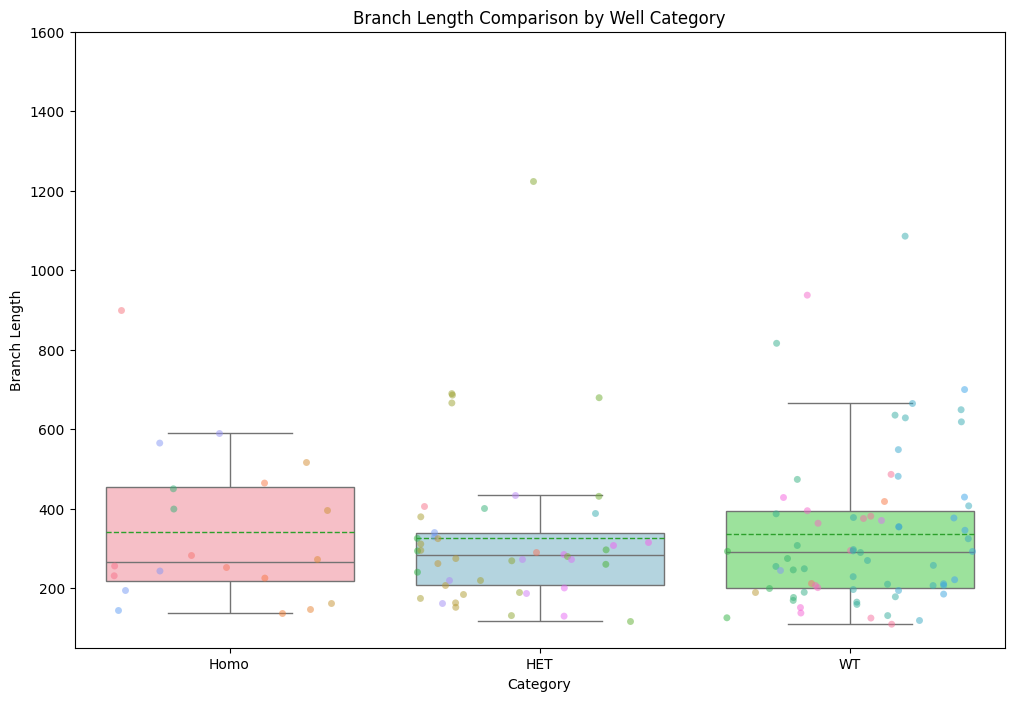

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

def extract_lengths(dfs, min_branches=1, dense_percentile=0):
    
    lengths = []
    categories = []
    unit_ids = []     
    for i, df in enumerate(dfs):
        # Determine category based on well index
        if i % 3 == 0:
            category = 'Homo'
        elif i % 3 == 1:
            category = 'HET'
        else:
            category = 'WT'

        #get max channel_density
        densities = []
        for j, density in enumerate(df['channel_density']):
            densities.append(eval(density)[0])
        max_channel_density = max(densities)       
        
        # Extract lengths and append to the lists
        for j, length_list in enumerate(df['length']):
            if len(eval(length_list))<min_branches: continue # exclude units with only one branch
            if eval(df['channel_density'][j])[0] < max_channel_density*dense_percentile: continue #exclude low density reconstructions
            unit_ids.extend(eval(df['unit_ids'][j])*len(eval(length_list)))
            lengths.extend(eval(length_list))  # Convert string representation of list to actual list
            categories.extend([category] * len(eval(length_list)))
            
    return lengths, categories, unit_ids

def plot_branch_lengths_by_gene(file_paths, min_branches=0, dense_percentile=0):
    # Extract lengths and categories
    lengths, categories, unit_ids = extract_lengths(file_paths, min_branches=min_branches, dense_percentile=dense_percentile)

    # Create a DataFrame for plotting
    data = pd.DataFrame({
        'Length': lengths,
        'Category': categories,
        'unit_ids': unit_ids
    })

    # Plotting
    plt.figure(figsize=(12, 8))
    # Set custom pastel colors for seaborn plots
    pastel_colors = ['#FFB6C1', '#ADD8E6', '#90EE90']

    plt.figure(figsize=(12, 8))
    # Boxplot with custom pastel colors
    sns.boxplot(x='Category', y='Length', data=data, showmeans=True, meanline=True, showfliers=False, palette=pastel_colors)

    # Stripplot with jitter and color coding based on unit_id
    unique_unit_ids = data['unit_ids'].unique()
    palette = sns.color_palette('husl', len(unique_unit_ids))  # Create a color palette based on the number of unique unit_ids
    unit_id_color_map = dict(zip(unique_unit_ids, palette))

    sns.stripplot(x='Category', y='Length', data=data, jitter=True, alpha=0.5,
                  palette=unit_id_color_map, hue='unit_ids', dodge=True, legend=False)

    plt.title('Branch Length Comparison by Well Category')
    plt.xlabel('Category')
    plt.ylabel('Branch Length')
    plt.ylim(50, 1600)
    plt.grid(False)
    #plt.legend(title='unit_ids', bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend position
    plt.show()

#from lib_plotting_and_analysis import plot_branch_lengths_by_gene
plot_branch_lengths_by_gene(dfs)
plot_branch_lengths_by_gene(dfs, min_branches=2)
plot_branch_lengths_by_gene(dfs, dense_percentile=0.95)

Negative value found in unit_id: [182], stream_id: 4


/tmp/ipykernel_1381862/789097992.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y='Length', data=data, showmeans=True, meanline=True, showfliers=False, palette=pastel_colors)


<Figure size 1200x800 with 0 Axes>

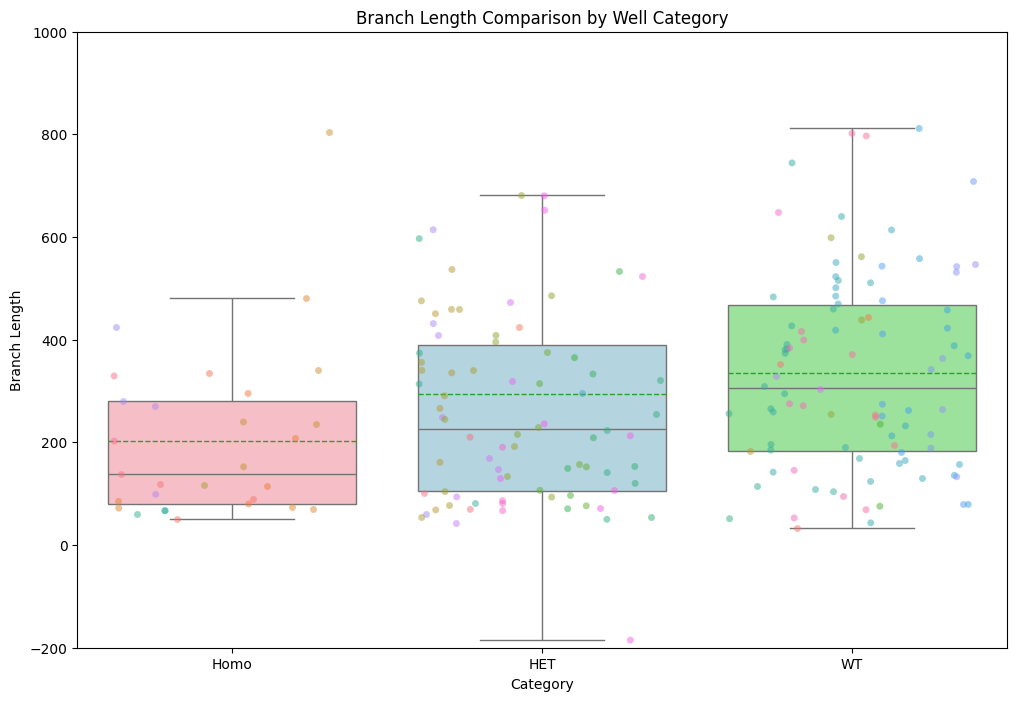

Negative value found in unit_id: [182], stream_id: 4


/tmp/ipykernel_1381862/789097992.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y='Length', data=data, showmeans=True, meanline=True, showfliers=False, palette=pastel_colors)


<Figure size 1200x800 with 0 Axes>

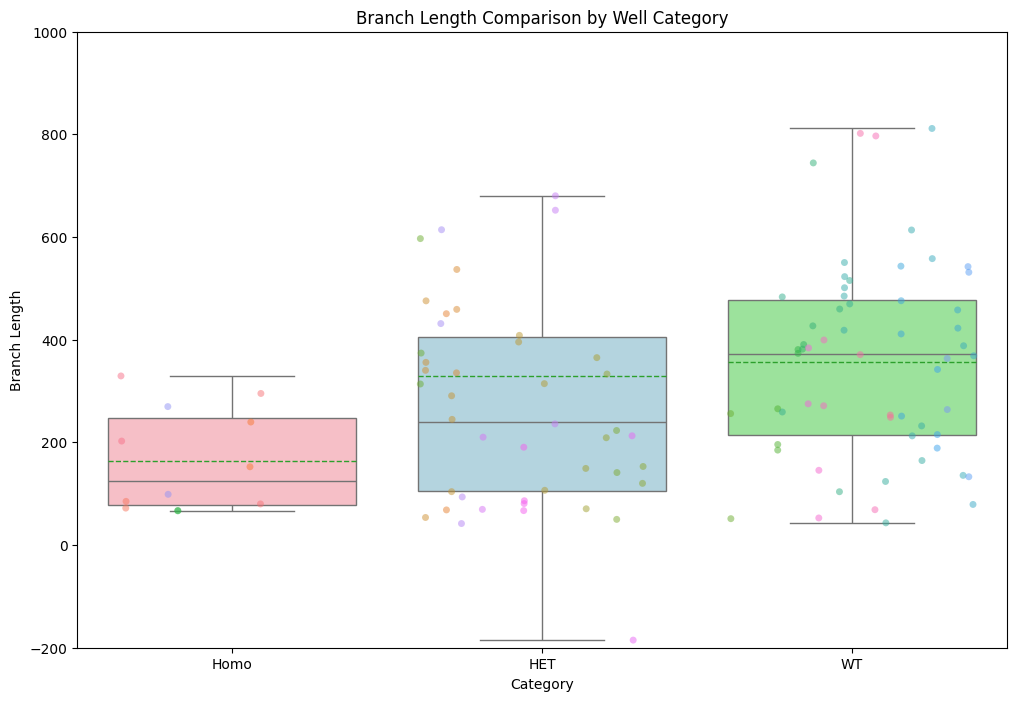

/tmp/ipykernel_1381862/789097992.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y='Length', data=data, showmeans=True, meanline=True, showfliers=False, palette=pastel_colors)


<Figure size 1200x800 with 0 Axes>

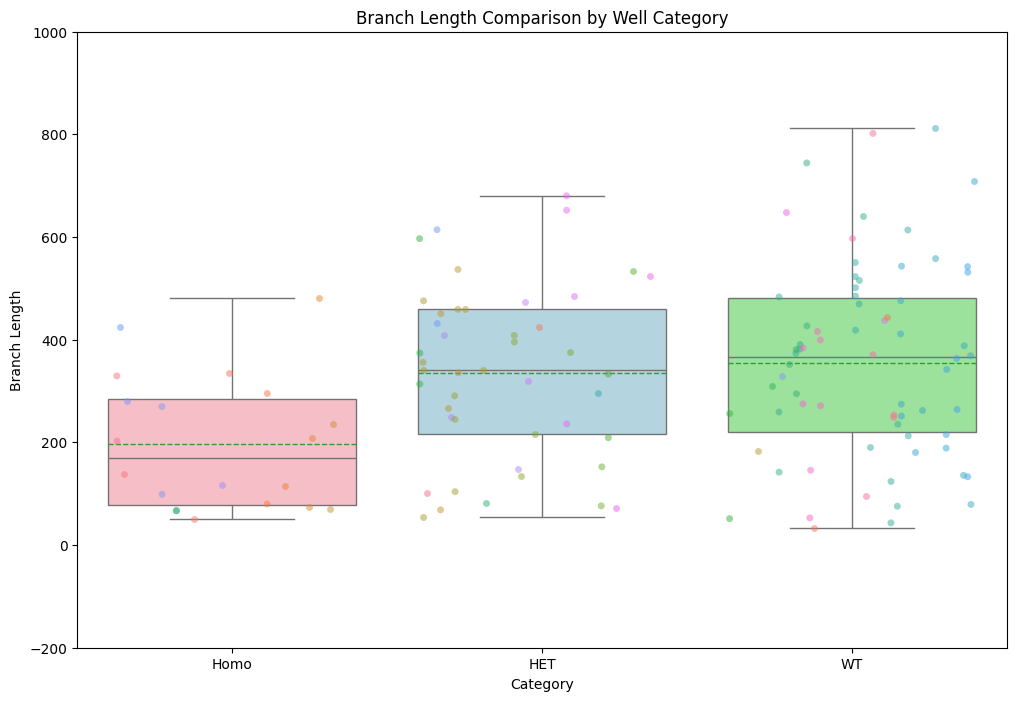

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

def extract_velocities(dfs, min_branches=1, dense_percentile=0):
    
    lengths = []
    categories = []
    unit_ids = []     
    for i, df in enumerate(dfs):
        # Determine category based on well index
        if i % 3 == 0:
            category = 'Homo'
        elif i % 3 == 1:
            category = 'HET'
        else:
            category = 'WT'

        #get max channel_density
        densities = []
        for j, density in enumerate(df['channel_density']):
            densities.append(eval(density)[0])
        max_channel_density = max(densities)       
        
        # Extract lengths and append to the lists
        for j, vel_list in enumerate(df['velocity']):
            if len(eval(vel_list))<min_branches: continue # exclude units with only one branch
            if eval(df['channel_density'][j])[0] < max_channel_density*dense_percentile: continue #exclude low density reconstructions
            unit_ids.extend(eval(df['unit_ids'][j])*len(eval(vel_list)))
            lengths.extend(eval(vel_list))  # Convert string representation of list to actual list
            categories.extend([category] * len(eval(vel_list)))
            
            # Check for negative values in vel_list
            for vel in eval(vel_list):
                if vel < 0:
                    print(f"Negative value found in unit_id: {eval(df['unit_ids'][j])}, stream_id: {i}")
            
    return lengths, categories, unit_ids

def plot_velocities_by_gene(file_paths, min_branches=0, dense_percentile=0):
    # Extract lengths and categories
    lengths, categories, unit_ids = extract_velocities(file_paths, min_branches=min_branches, dense_percentile=dense_percentile)

    # Create a DataFrame for plotting
    data = pd.DataFrame({
        'Length': lengths,
        'Category': categories,
        'unit_ids': unit_ids
    })

    # Plotting
    plt.figure(figsize=(12, 8))
    # Set custom pastel colors for seaborn plots
    pastel_colors = ['#FFB6C1', '#ADD8E6', '#90EE90']

    plt.figure(figsize=(12, 8))
    # Boxplot with custom pastel colors
    sns.boxplot(x='Category', y='Length', data=data, showmeans=True, meanline=True, showfliers=False, palette=pastel_colors)

    # Stripplot with jitter and color coding based on unit_id
    unique_unit_ids = data['unit_ids'].unique()
    palette = sns.color_palette('husl', len(unique_unit_ids))  # Create a color palette based on the number of unique unit_ids
    unit_id_color_map = dict(zip(unique_unit_ids, palette))

    sns.stripplot(x='Category', y='Length', data=data, jitter=True, alpha=0.5,
                  palette=unit_id_color_map, hue='unit_ids', dodge=True, legend=False)

    plt.title('Branch Length Comparison by Well Category')
    plt.xlabel('Category')
    plt.ylabel('Branch Length')
    plt.ylim(-200, 1000)
    plt.grid(False)
    #plt.legend(title='unit_ids', bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend position
    plt.show()

#from lib_plotting_and_analysis import plot_branch_lengths_by_gene
plot_velocities_by_gene(dfs)
plot_velocities_by_gene(dfs, min_branches=2)
plot_velocities_by_gene(dfs, dense_percentile=0.95)